# Oregon Voters Data

*If you have any updates on the following notes about the data, please let me know!*

Data about voter registration in Oregon is owned and posted by the Secretary of State, but the main link only has PDFs:
https://sos.oregon.gov/elections/Pages/electionsstatistics.aspx

Data.Oregon also shares the data and a few quick charts.  There is a link to the data source, but that leads down a rabbit hole where you might eventually find the data.
https://data.oregon.gov/Administrative/Voter-Registration-by-County/ef2p-uin9

Catalog.data has the latest CSV file from the Oregon Secretary of State
https://catalog.data.gov/dataset/voter-registration-data

## The purpose of this notebook is to:
- Overall distribution of voter registration in Oregon
- Overall county distribution of voter registration in Oregon
- Voter registration charts by county

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
# import the data
df = pd.read_csv('Voter_Registration_Data.csv')

## Data Exploration

In [2]:
df.head()

,COUNTY,HD_CODE,HD_NAME,CD_CODE,CD_NAME,PARTY,SYSDATE,COUNT(V.ID)
0,DOUGLAS,SR07,House District 07,4th Cong,US Congressional District 4,Pacific Green,11/14/2017,53
1,JACKSON,SR04,House District 04,2nd Cong,US Congressional District 2,Democrat,11/14/2017,8436
2,MULTNOMAH,SR48,House District 48,3rd Cong,US Congressional District 3,Working Families Party of Oregon,11/14/2017,230
3,DOUGLAS,SR01,House District 01,4th Cong,US Congressional District 4,Other,11/14/2017,85
4,WASHINGTON,SR24,House District 24,1st Cong,US Congressional District 1,Progressive,11/14/2017,7


In [3]:
df.columns = (['COUNTY', 'HD_CODE', 'HD_NAME', 'CD_CODE', 'CD_NAME', 'PARTY',
       'SYSDATE', 'NUMBER_OF_VOTERS'])
df.shape

(61888, 8)

In [4]:
df['SYSDATE'].unique() # how many SYSDATE snapshots of voter registration exist in this data?

array(['11/14/2017', '07/01/2017', '12/01/2016', '11/01/2016',
       '04/01/2017', '09/01/2017', '05/01/2017', '03/01/2017',
       '01/01/2017', '02/01/2017', '10/01/2017', '06/01/2017',
       '11/03/2017', nan, '08/01/2017', '12/19/2017', '01/24/2018',
       '02/13/2018', '03/12/2018', '04/24/2018', '05/04/2018',
       '06/19/2018', '07/03/2018', '08/02/2018', '09/05/2018',
       '10/03/2018', '11/15/2018', '12/07/2018', '01/10/2019',
       '02/08/2019', '03/11/2019', '04/10/2019', '05/10/2019',
       '06/10/2019', '07/01/2019', '08/07/2019', '09/05/2019',
       '10/03/2019', '11/12/2019', '12/23/2019', '01/06/2020',
       '02/06/2020', '03/04/2020', '04/02/2020', '05/04/2020',
       '06/04/2020', '07/08/2020', '08/06/2020', '09/03/2020'],
      dtype=object)

## Overall distribution of voter registration in Oregon

In [5]:
# Oregon's population is about 4.2 million as of September 2020, about 2% more than in 2018
total_voters_2018 = df[df.SYSDATE == '09/05/2018'].sum() # 2,706,777 registered voters
total_voters = df[df.SYSDATE == '09/03/2020'].sum() # 2,868,686 voters, a 6% gain

In [6]:
# What is the breakout of registered voters by party, and the change since 2018? 
party_totals = df[df.SYSDATE == '09/03/2020'].groupby(['PARTY']).sum().reset_index()
party_totals_2018 = df[df.SYSDATE == '09/05/2018'].groupby(['PARTY']).sum().reset_index()
party_totals_compare = party_totals_2018.merge(party_totals, on = 'PARTY')
party_totals_compare.columns = ['PARTY', 'Voters2018', 'Voters2020']
party_totals_compare_percent = party_totals_compare.assign(Percent = party_totals_compare['Voters2020']/total_voters['NUMBER_OF_VOTERS'])
party_totals_compare_percent = party_totals_compare_percent.assign(Delta = party_totals_compare_percent.Voters2020 - party_totals_compare_percent.Voters2018)
party_totals_compare_percent.sort_values('Percent', ascending = False)

,PARTY,Voters2018,Voters2020,Percent,Delta
1,Democrat,958884,1018276,0.354963,59392
4,Nonaffiliated,863118,934646,0.325810,71528
8,Republican,700368,731716,0.255070,31348
2,Independent Party,120989,124657,0.043454,3668
3,Libertarian,19088,19894,0.006935,806
5,Other,18761,16889,0.005887,-1872
9,Working Families Party of Oregon,10059,8716,0.003038,-1343
6,Pacific Green,9629,7837,0.002732,-1792
0,Constitution,3742,3584,0.001249,-158
7,Progressive,2139,2471,0.000861,332


In [14]:
# Which party registered more voters since Janaury?  
# Note that nonaffiliated voters have to change their registration 
#   to participate in the May primaries
party_totals_jan = df[df.SYSDATE == '01/06/2020'].groupby(['PARTY']).sum().reset_index()
party_totals_jan.sort_values('NUMBER_OF_VOTERS', ascending = False)
party_totals_delta = party_totals_jan.merge(party_totals, on = 'PARTY')
party_totals_delta = party_totals_delta.assign(Delta = party_totals_delta.NUMBER_OF_VOTERS_y - party_totals_delta.NUMBER_OF_VOTERS_x)
party_totals_delta = party_totals_delta.assign(Delta_pct = party_totals_delta.Delta/party_totals_delta.NUMBER_OF_VOTERS_x)
#county_pct = percent.assign(Percent = percent['Registered Voters_x']/percent['Registered Voters_y'])
party_totals_delta.columns = ['PARTY','Voters Jan-2020','Voters Sep-2020','Delta','Delta_pct']
party_totals_delta.sort_values('Voters Sep-2020', ascending = False)

,PARTY,Voters Jan-2020,Voters Sep-2020,Delta,Delta_pct
1,Democrat,970284,1018276,47992,0.049462
4,Nonaffiliated,955801,934646,-21155,-0.022133
8,Republican,701970,731716,29746,0.042375
2,Independent Party,124306,124657,351,0.002824
3,Libertarian,19393,19894,501,0.025834
5,Other,17988,16889,-1099,-0.061096
9,Working Families Party of Oregon,9524,8716,-808,-0.084838
6,Pacific Green,8493,7837,-656,-0.077240
0,Constitution,3703,3584,-119,-0.032136
7,Progressive,2340,2471,131,0.055983


## County distribution of voter registration in Oregon

In [10]:
# (1) use the latest snapshot 
# (2) aggregate the voter registration count by COUNTY, PARTY, 
current_counties = df[df.SYSDATE == '09/03/2020'].groupby(['COUNTY','PARTY']).sum().reset_index()
current_counties.columns = ['County','Party','RegisteredVoters']
# January snapshot 
jan_counties = df[df.SYSDATE == '01/06/2020'].groupby(['COUNTY','PARTY']).sum().reset_index()
jan_counties.columns = ['County','Party','RegisteredVoters']
# 2018 snapshot
sep2018_counties = df[df.SYSDATE == '09/05/2018'].groupby(['COUNTY','PARTY']).sum().reset_index()
sep2018_counties.columns = ['County','Party','RegisteredVoters']

In [16]:
# the total number of registered voters by county
sum_county = current_counties.groupby(['County']).sum().reset_index()
sum_county_jan = jan_counties.groupby(['County']).sum().reset_index()
sum_county_sep2018 = sep2018_counties.groupby(['County']).sum().reset_index()

# the party with the maximum registered voters per county and quantity
# Remove nonaffiliated, as that is the largest party for some counties
party_counties = current_counties[current_counties.Party != 'Nonaffiliated']
party_counties_jan = jan_counties[jan_counties.Party != 'Nonaffiliated']
party_counties_sep2018 = sep2018_counties[sep2018_counties.Party != 'Nonaffiliated']

# What is the highest party registrants for each county?
max_county = party_counties.sort_values('RegisteredVoters', ascending = False).drop_duplicates(['County']).sort_values('County')
max_county_jan = party_counties_jan.sort_values('RegisteredVoters', ascending = False).drop_duplicates(['County']).sort_values('County')
max_county_sep2018 = party_counties_sep2018.sort_values('RegisteredVoters', ascending = False).drop_duplicates(['County']).sort_values('County')
percent = max_county.merge(sum_county, on = 'County', how = 'left')
county_pct = percent.assign(Percent = percent['RegisteredVoters_x']/percent['RegisteredVoters_y'])
county_pct.columns = ['County', 'Party', 'Voters2018', 'Voters2020','Percent']
county_pct.sort_values('Percent', ascending = False) # output 

,County,Party,Voters2018,Voters2020,Percent
25,MULTNOMAH,Democrat,288906,547554,0.527630
18,LAKE,Republican,2729,5333,0.511719
12,HARNEY,Republican,2695,5357,0.503080
34,WHEELER,Republican,533,1065,0.500469
11,GRANT,Republican,2661,5363,0.496178
27,SHERMAN,Republican,683,1425,0.479298
31,WALLOWA,Republican,2732,5771,0.473401
0,BAKER,Republican,5653,12102,0.467113
1,BENTON,Democrat,25951,58843,0.441021
6,CROOK,Republican,8192,18674,0.438685


In [17]:
# Percent county by largest party
# of counties with at least 35% Democrat / Republican
demc = county_pct[(county_pct.Percent > 0.35) & (county_pct.Party == 'Democrat')] # 6 of 13 total
repc = county_pct[(county_pct.Percent > 0.35) & (county_pct.Party == 'Republican')] # 15 of 23 total

## Voter registration charts by county

In [37]:
# data for multnomah county
county_multnomah = df[df.COUNTY == 'MULTNOMAH'].groupby(['COUNTY','SYSDATE','PARTY']).sum().reset_index()
county_multnomah.columns = ['COUNTY', 'MONTH', 'PARTY', 'REGISTERED VOTERS']
county_multnomah['MONTH'] = county_multnomah['MONTH'].astype('datetime64')
county_choose = county_multnomah

In [74]:
def county_chart(county_chosen):
     county_chosen = df[df.COUNTY == county_chosen].groupby(['COUNTY','SYSDATE','PARTY']).sum().reset_index()
     county_chosen.columns = ['COUNTY', 'MONTH', 'PARTY', 'REGISTERED VOTERS']
     county_chosen['MONTH'] = county_chosen['MONTH'].astype('datetime64')
     sns.set(rc={'figure.figsize':(11.7,8.27)}) # seaborn resize the figure 
     sns.set_style(style='white')               # seaborn background
     # Create a visualization
     sns.lineplot(
         data=county_chosen,
         x="MONTH", 
         y="REGISTERED VOTERS", 
         hue="PARTY"
     )

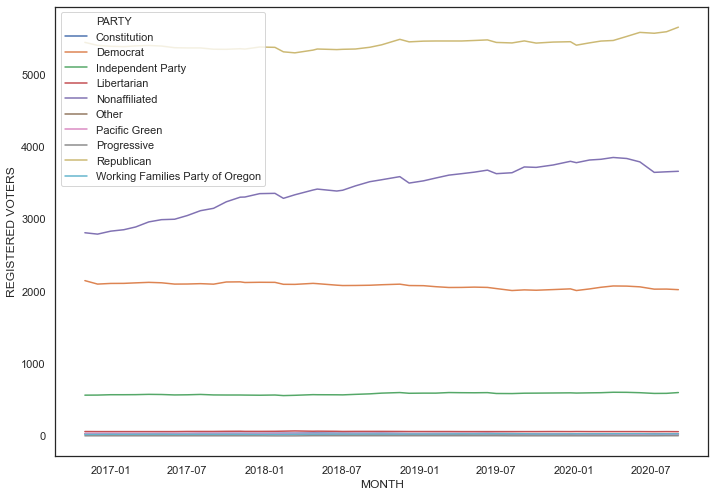

In [75]:
county_chart('BAKER')

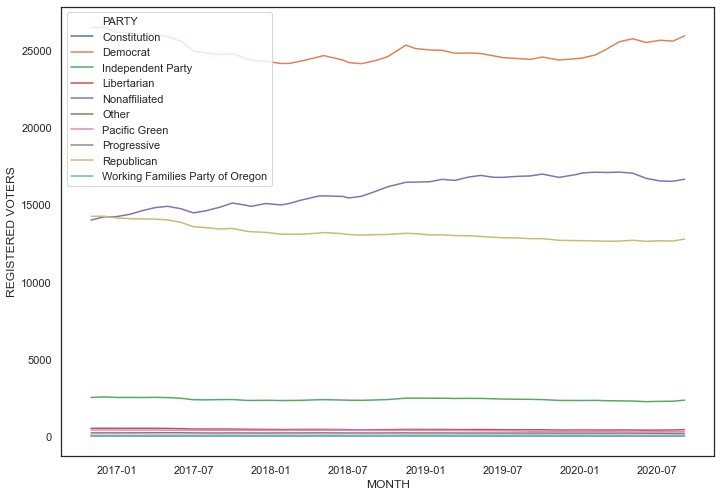

In [76]:
county_chart('BENTON')

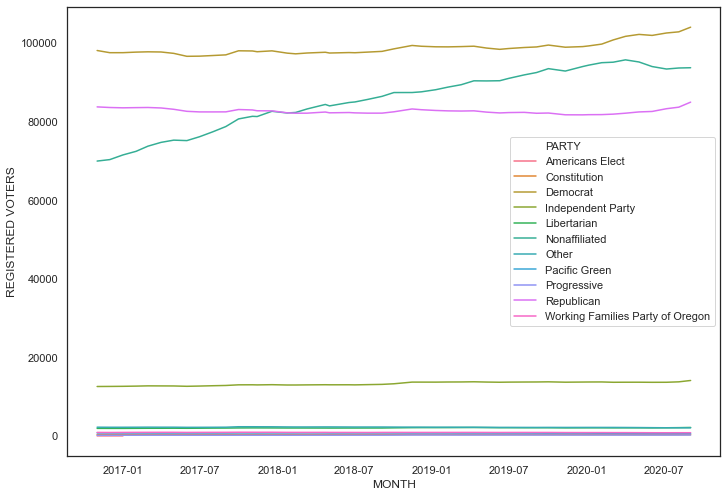

In [77]:
county_chart('CLACKAMAS')

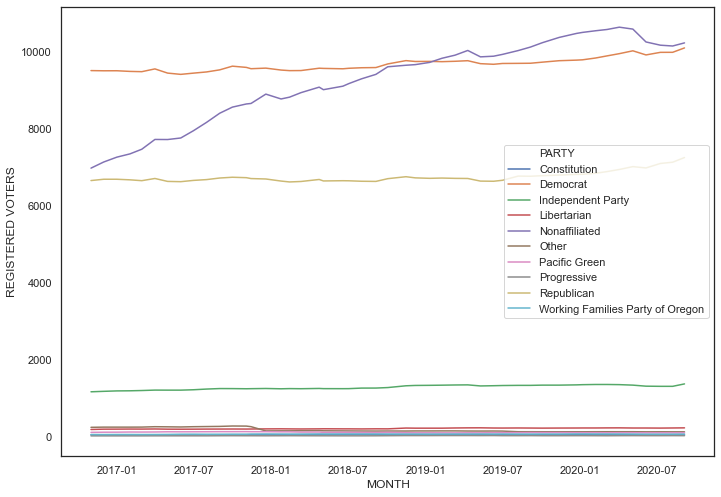

In [78]:
county_chart('CLATSOP')

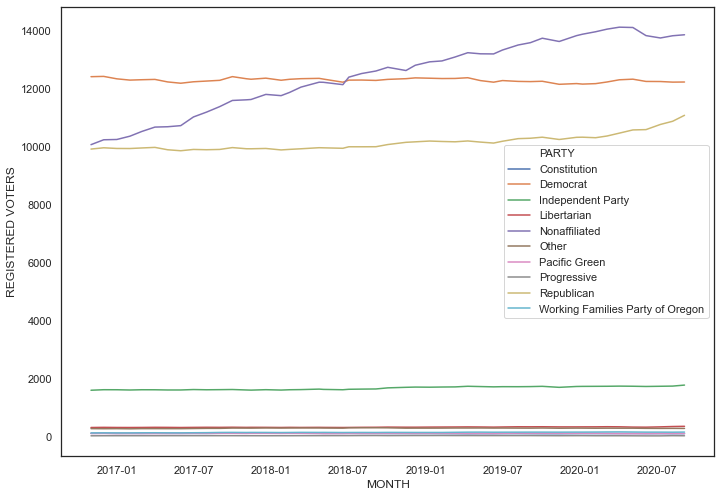

In [79]:
county_chart('COLUMBIA')

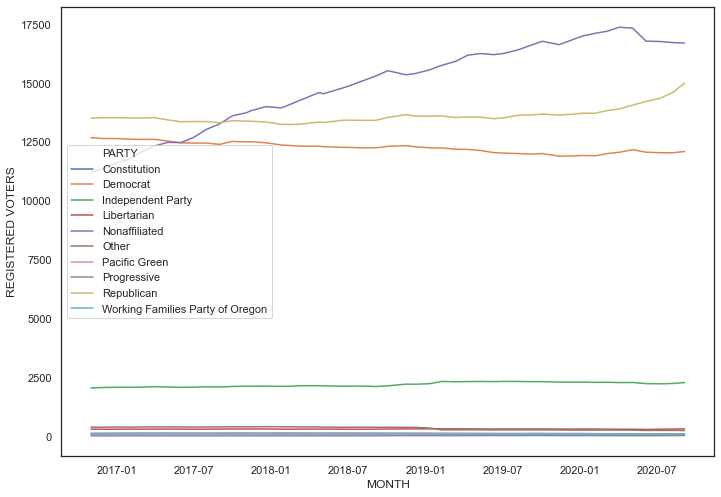

In [80]:
county_chart('COOS')

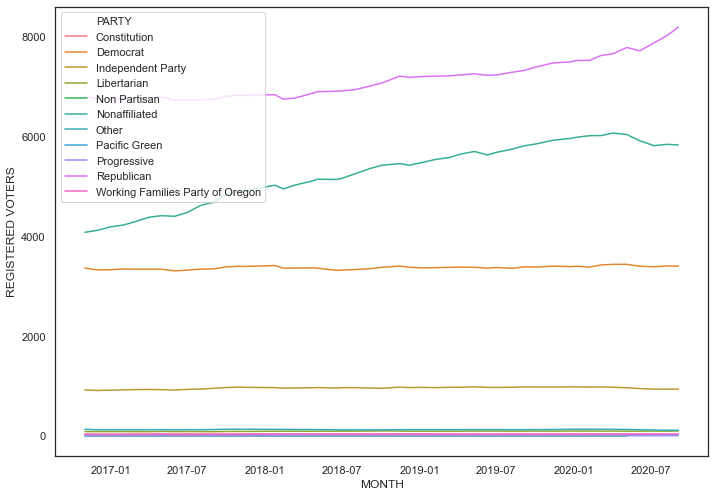

In [81]:
county_chart('CROOK')

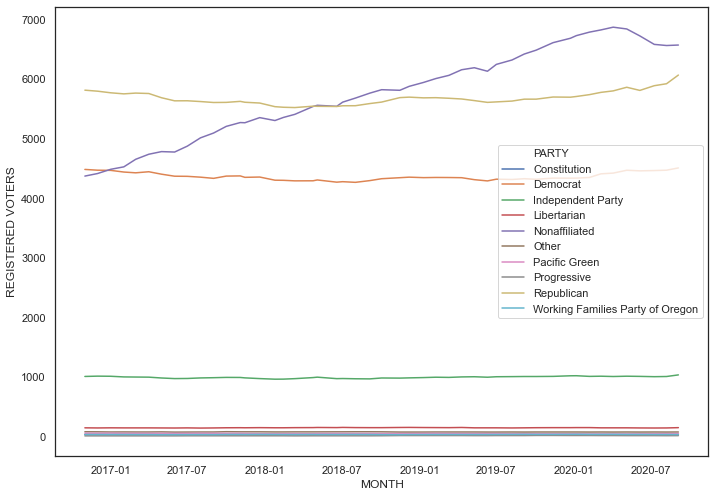

In [82]:
county_chart('CURRY')

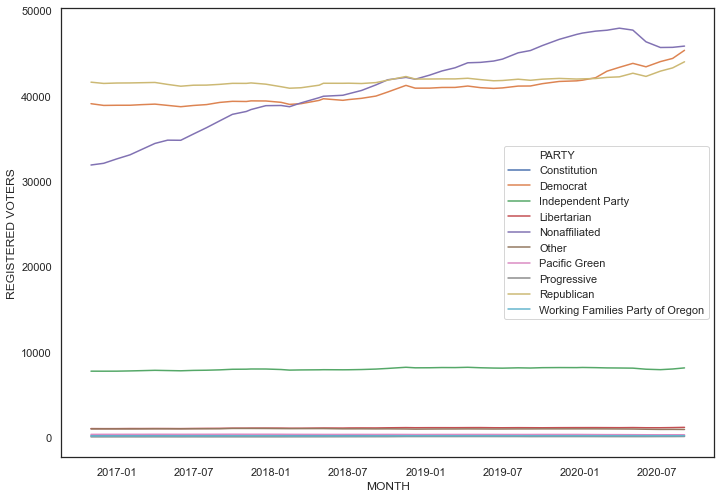

In [83]:
county_chart('DESCHUTES')

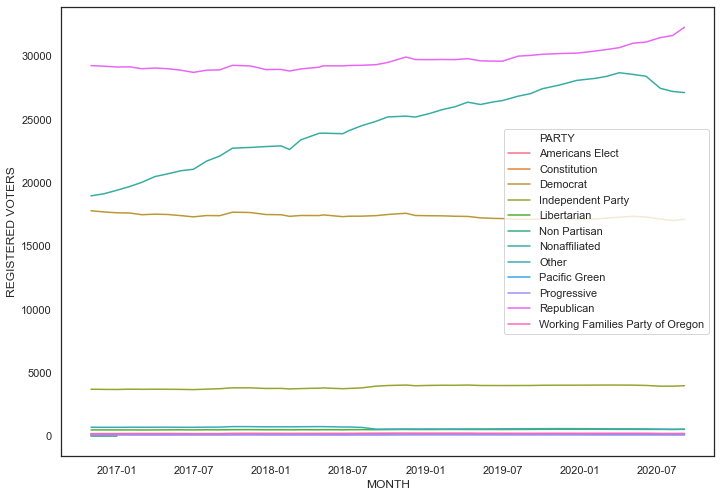

In [84]:
county_chart('DOUGLAS')

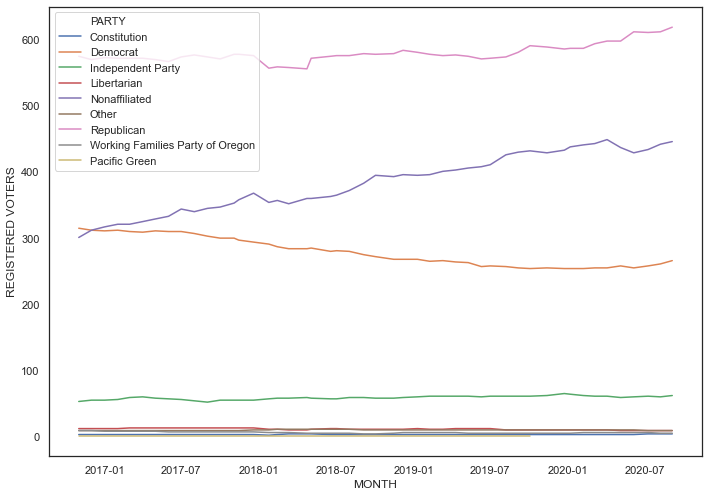

In [85]:
county_chart('GILLIAM')

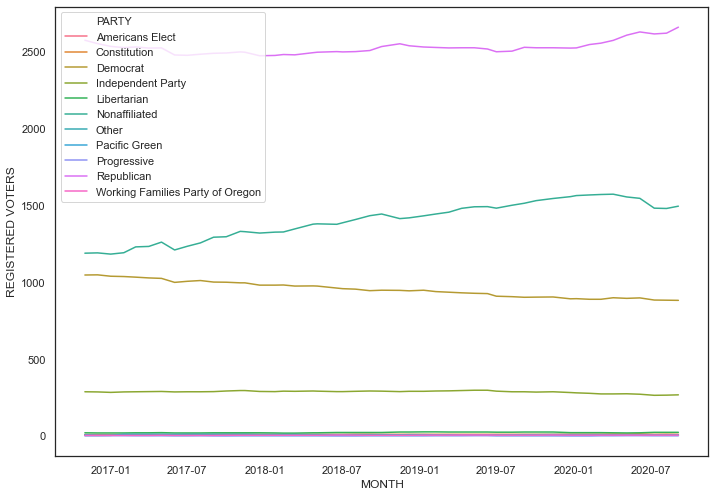

In [86]:
county_chart('GRANT')

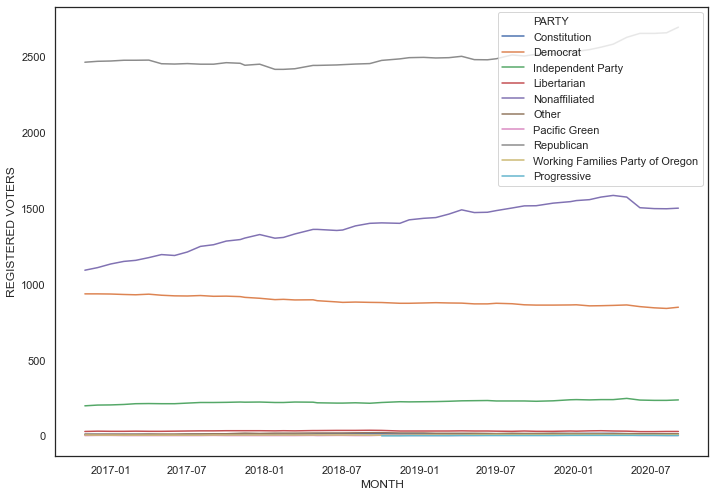

In [87]:
county_chart('HARNEY')

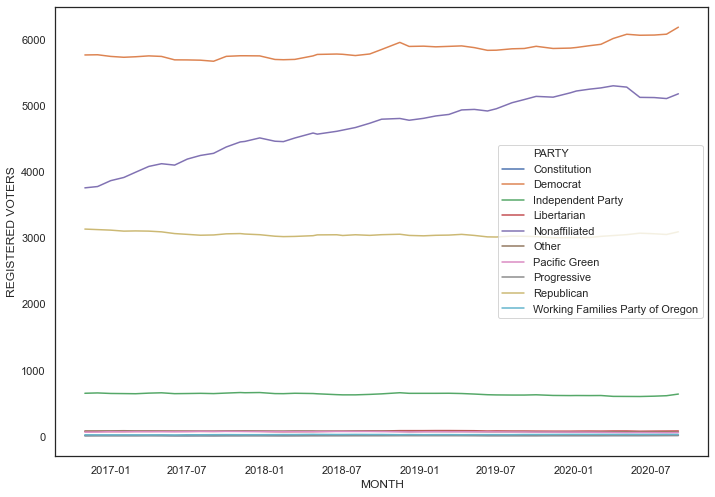

In [88]:
county_chart('HOOD RIVER')

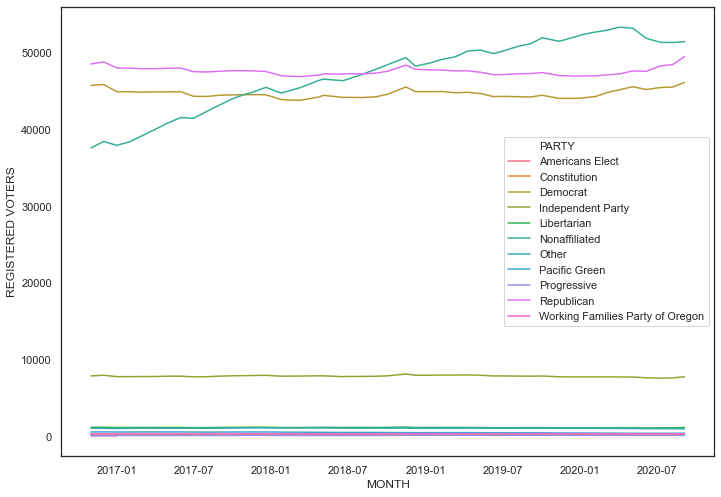

In [89]:
county_chart('JACKSON')

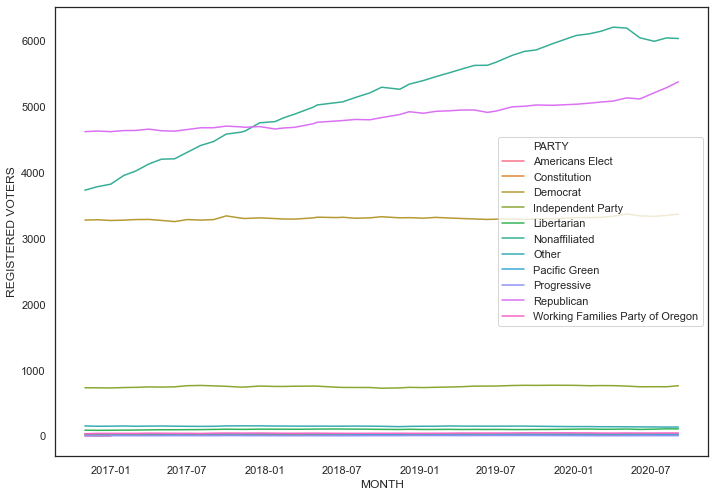

In [90]:
county_chart('JEFFERSON')

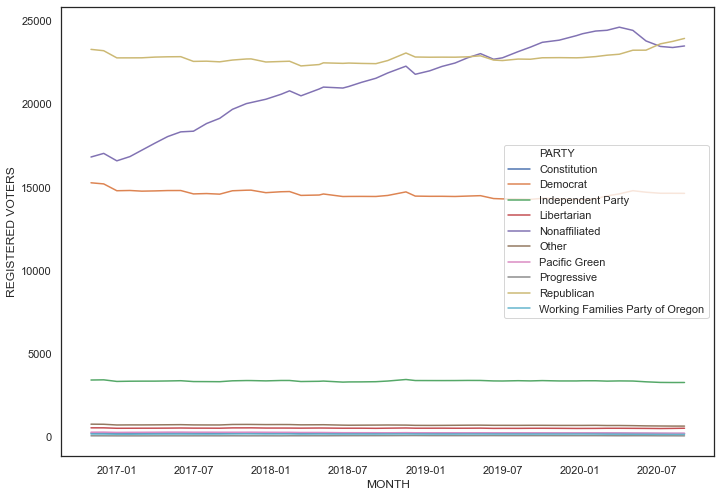

In [91]:
county_chart('JOSEPHINE')

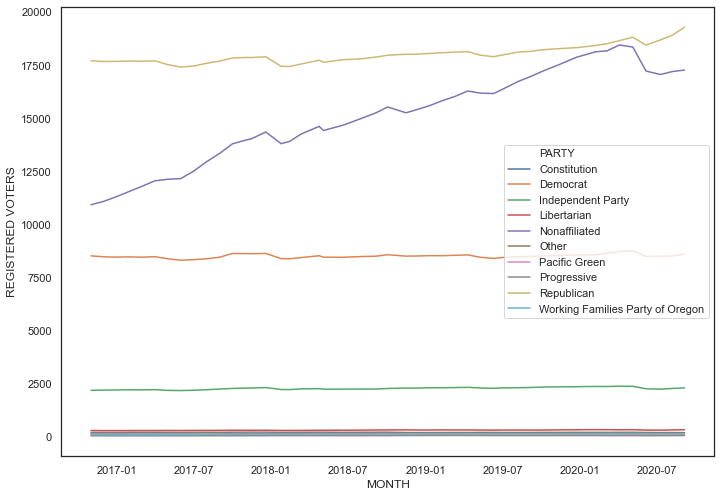

In [92]:
county_chart('KLAMATH')

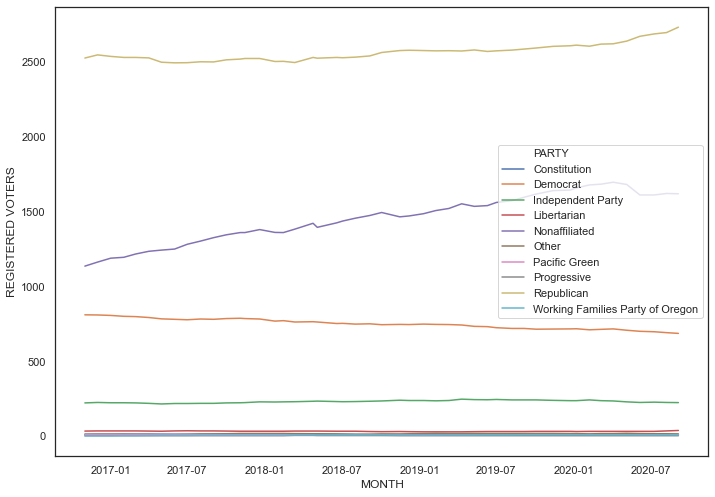

In [93]:
county_chart('LAKE')

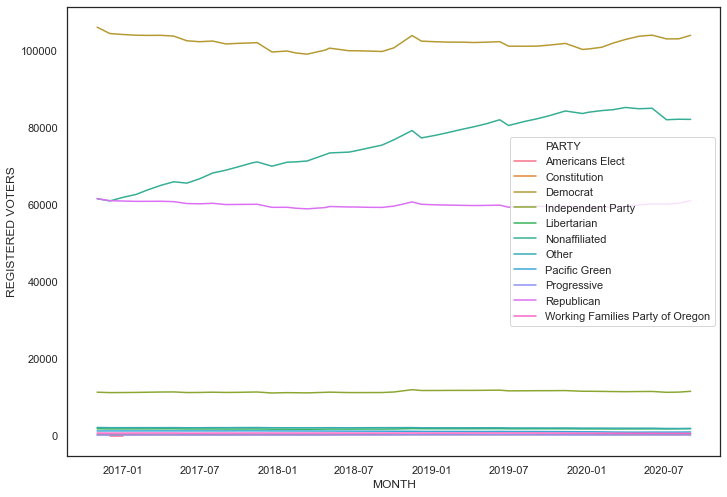

In [94]:
county_chart('LANE')

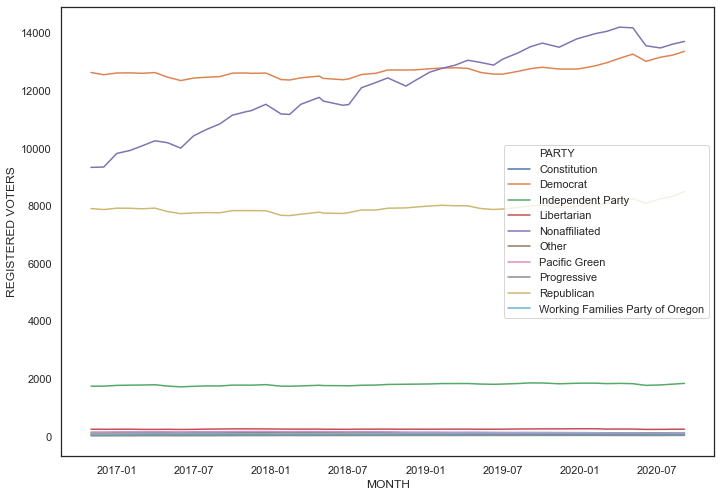

In [95]:
county_chart('LINCOLN')

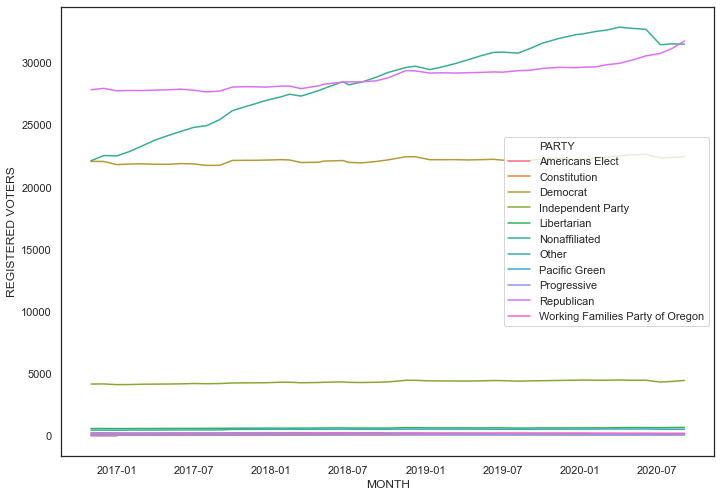

In [96]:
county_chart('LINN')

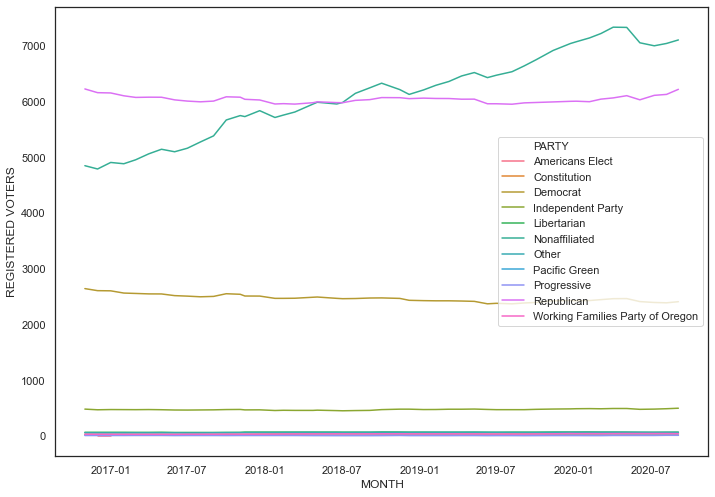

In [97]:
county_chart('MALHEUR')

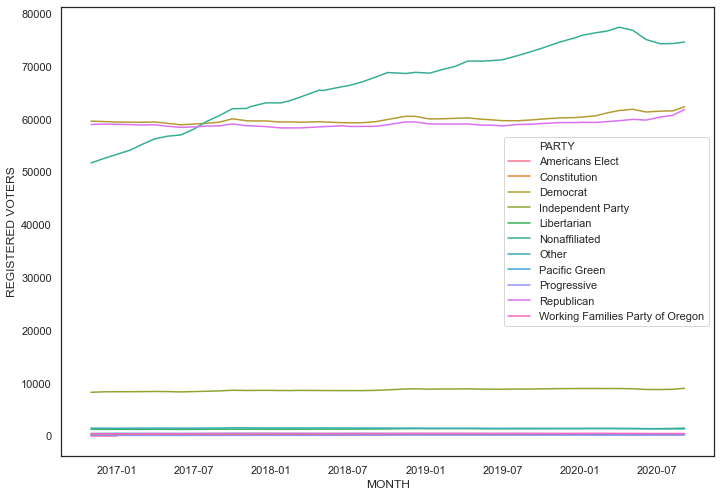

In [98]:
county_chart('MARION')

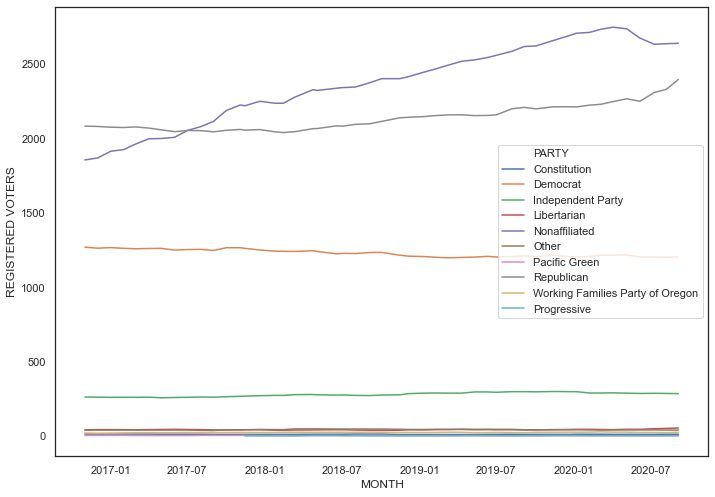

In [99]:
county_chart('MORROW')

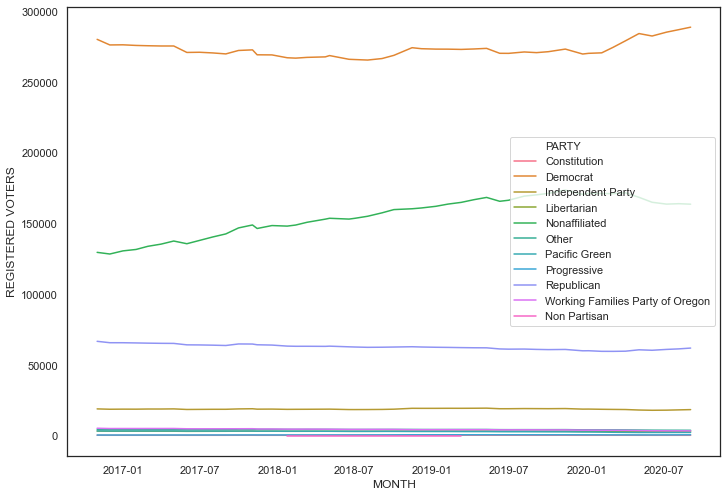

In [100]:
county_chart('MULTNOMAH')

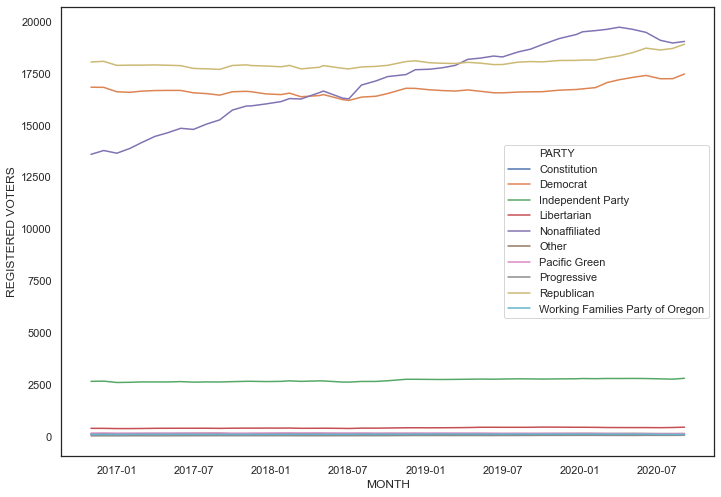

In [101]:
county_chart('POLK')

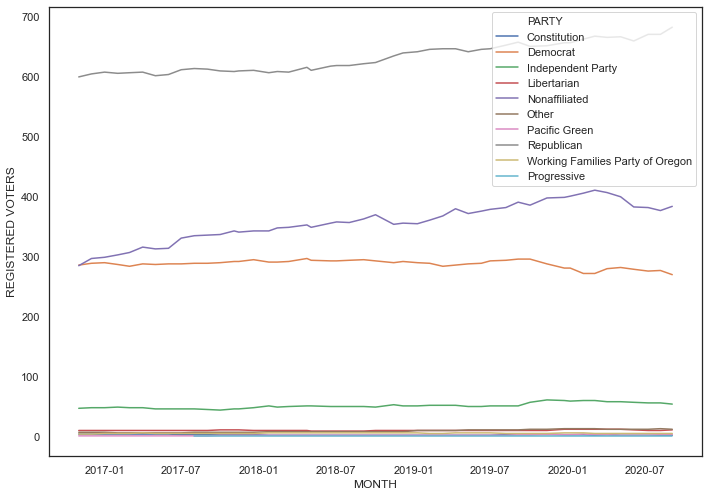

In [102]:
county_chart('SHERMAN')

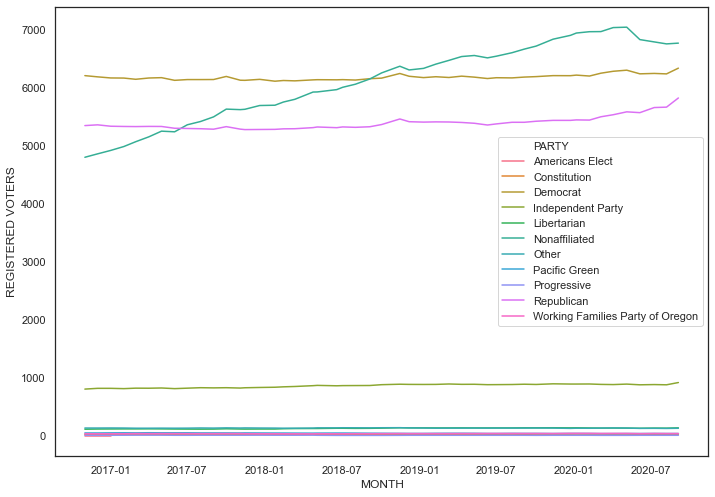

In [103]:
county_chart('TILLAMOOK')

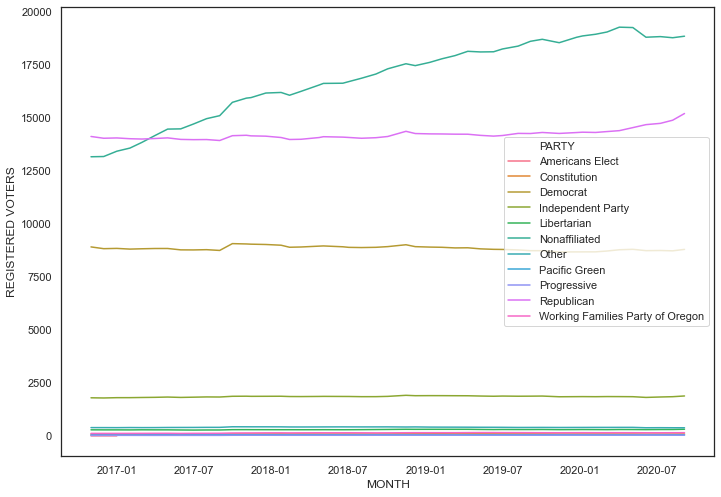

In [104]:
county_chart('UMATILLA')

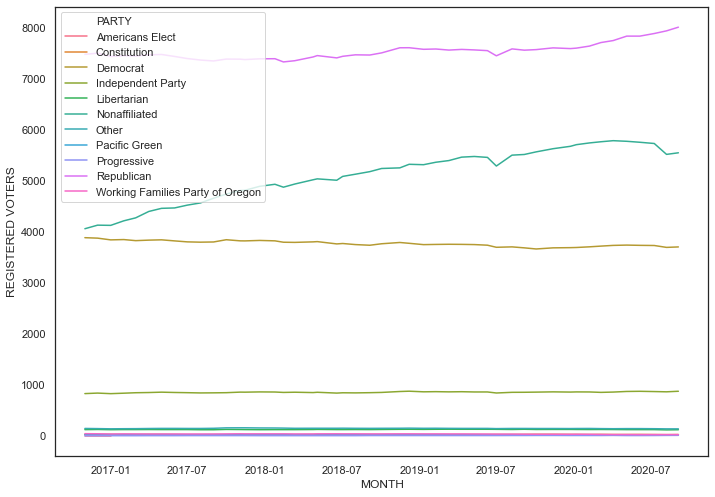

In [105]:
county_chart('UNION')

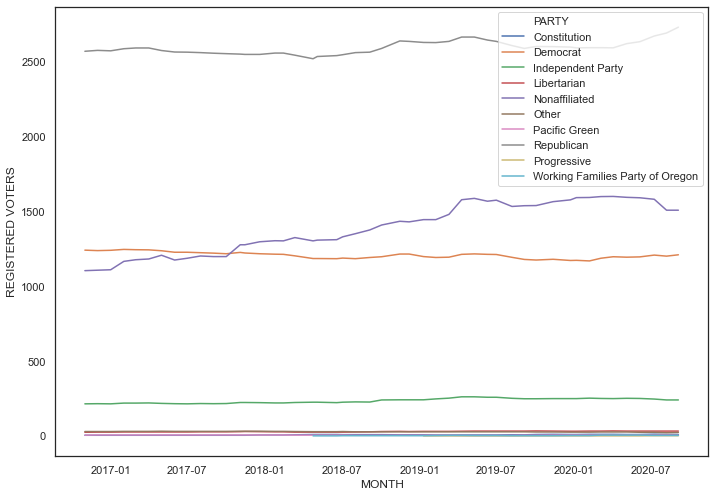

In [106]:
county_chart('WALLOWA')

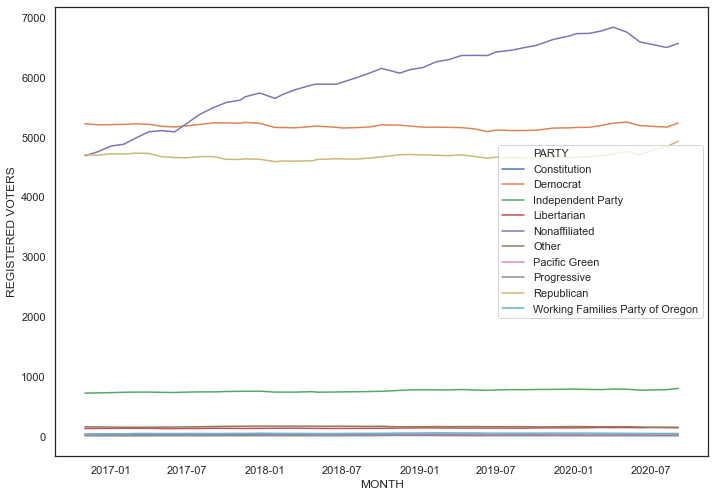

In [107]:
county_chart('WASCO')

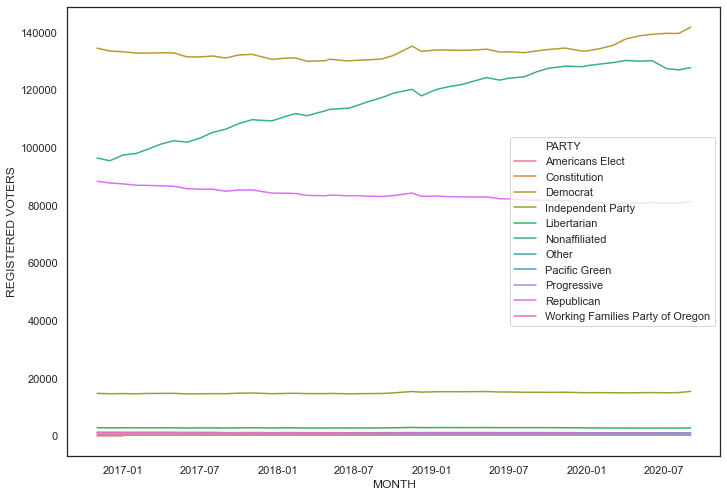

In [108]:
county_chart('WASHINGTON')

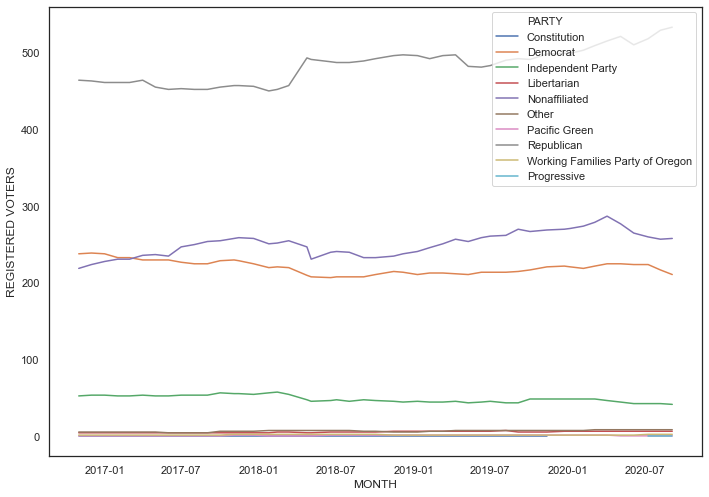

In [109]:
county_chart('WHEELER')

In [ ]:
county_chart('YAMHILL')

In [40]:
# could also plot with ggplot, example 
# county_douglas = df[df.COUNTY == 'DOUGLAS'].groupby(['COUNTY','SYSDATE','PARTY']).sum().reset_index()
# county_douglas['SYSDATE'] = county_douglas['SYSDATE'].astype('datetime64')
# ggplot(county_douglas, aes(x='SYSDATE',y='NUMBER_OF_VOTERS', color = 'PARTY')) + geom_line() + \
# theme(axis_text_x  = element_text(angle = 90, hjust = 1))

We see that the greatest trend in voter registration for Oregon in the last four years is a large number of nonaffiliated voters registering to vote.  That trend outweighs the significance of any particular trends for Democrats or Republicans.

*FUTURE IMPROVEMENTS 
(1) make the colors consistent across all charts
(2) create a way to display all charts without calling the function for each county, and add the county as a title to the chart*